In [230]:
### Rundown is 
# 1) Matrix => 2) transformMgmtAssessmentScore constants + feedthrough => 
# => 3) generateTheData & compareByPlotting
import nbimporter
import dataGen

import pandas as pd
import names
import numpy as np
import matplotlib.pyplot as plt


from pylab import plot, show, axis, subplot, xlabel, ylabel, grid

import math
import random

%matplotlib inline

In [231]:
# LoadPpl - holds the constants for the total size of the dataset of individuals, the ratio 
# between males and females, as well as that of races. It returns the number of individuals in the dataset 
# that are of the passed in race and gender.
# @param - race, gender
# @return - number of ppl to be of the passed in race x gender.
def loadPpl(race, gender):
    numPpl = 8000
    Gender = {"male": .60, "female": .40}
    races = {
        "White": .55,
        "African-American": .14,
        "Asian": .15,
        "Hispanic": .10,
        "Other": .06
    }
    return int(math.floor(numPpl * Gender[gender] * races[race]))

asian_m = loadPpl("Asian", "male")
asian_f = loadPpl("Asian", "female")

white_m = loadPpl("White", "male")
white_f = loadPpl("White", "female")

hispanic_m = loadPpl("Hispanic", "male")
hispanic_f = loadPpl("Hispanic", "female")

other_m = loadPpl("Other", "male")
other_f = loadPpl("Other", "female")

black_m = loadPpl("African-American", "male")
black_f = loadPpl("African-American", "female")


### Metric 1 - Manager's Assessment Score Correlate Generation

In [232]:
### How can I turn this into a function
asian_m_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]

asian_f_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]

white_m_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]

white_f_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]


black_m_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]

black_f_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]


hispanic_m_matrix = [
     [1.3, .1, -1.1, 1.5, 1.5, 1.61],
     [1.0, -1., .3, 1.5, 1.01, .993],
     [1.1, .8, -1.1, 1.01, -1, .909],
     [1.1, 0.2, -1.001, 1.1, .98, -1.5],
     [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
     [1.03 , .998, 1.01,.9, 1.01, 1.3],
]


hispanic_f_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]


other_m_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]


other_f_matrix = [
    [1.3, .1, -1.1, 1.5, 1.5, 1.61],
    [1.0, -1., .3, 1.5, 1.01, .993],
    [1.1, .8, -1.1, 1.01, -1, .909],
    [1.1, 0.2, -1.001, 1.1, .98, -1.5],
    [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
    [1.03 , .998, 1.01,.9, 1.01, 1.3],
]

In [233]:
asian_m_mgmtScore, asian_m_correlatedFeatures = dataGen.featuresCorrelatingToMetric(asian_m, asian_m_matrix, numVars=6)
asian_f_mgmtScore, asian_f_correlatedFeatures = dataGen.featuresCorrelatingToMetric(asian_f, asian_f_matrix, numVars=6)

white_m_mgmtScore, white_m_correlatedFeatures = dataGen.featuresCorrelatingToMetric(white_m, white_m_matrix, numVars=6)
white_f_mgmtScore, white_f_correlatedFeatures = dataGen.featuresCorrelatingToMetric(white_f, white_f_matrix, numVars=6)

black_m_mgmtScore, black_m_correlatedFeatures = dataGen.featuresCorrelatingToMetric(black_m, black_m_matrix, numVars=6)
black_f_mgmtScore, black_f_correlatedFeatures = dataGen.featuresCorrelatingToMetric(black_f, black_f_matrix, numVars=6)

hispanic_m_mgmtScore, hispanic_m_correlatedFeatures = dataGen.featuresCorrelatingToMetric(hispanic_m, hispanic_m_matrix, numVars=6)
hispanic_f_mgmtScore, hispanic_f_correlatedFeatures = dataGen.featuresCorrelatingToMetric(hispanic_f, hispanic_f_matrix, numVars=6)

other_m_mgmtScore, other_m_correlatedFeatures = dataGen.featuresCorrelatingToMetric(other_m, other_m_matrix, numVars=6)
other_f_mgmtScore, other_f_correlatedFeatures = dataGen.featuresCorrelatingToMetric(other_f, other_f_matrix, numVars=6)


[[10.0021    6.23373   4.19849   3.2561    7.26461   5.2858  ]
 [ 6.23373   6.346149  1.377637  1.75      3.291293  3.996   ]
 [ 4.19849   1.377637  5.906381  1.2386    3.992109  1.9011  ]
 [ 3.2561    1.75      1.2386    6.672401  2.99991   0.35139 ]
 [ 7.26461   3.291293  3.992109  2.99991   6.266301  4.33896 ]
 [ 5.2858    3.996     1.9011    0.35139   4.33896   6.597104]]
[2.61133594e+01 3.47938463e-03 1.44985390e+00 2.53764659e+00
 5.14437724e+00 6.54171944e+00]
[[10.0021    6.23373   4.19849   3.2561    7.26461   5.2858  ]
 [ 6.23373   6.346149  1.377637  1.75      3.291293  3.996   ]
 [ 4.19849   1.377637  5.906381  1.2386    3.992109  1.9011  ]
 [ 3.2561    1.75      1.2386    6.672401  2.99991   0.35139 ]
 [ 7.26461   3.291293  3.992109  2.99991   6.266301  4.33896 ]
 [ 5.2858    3.996     1.9011    0.35139   4.33896   6.597104]]
[2.61133594e+01 3.47938463e-03 1.44985390e+00 2.53764659e+00
 5.14437724e+00 6.54171944e+00]
[[10.0021    6.23373   4.19849   3.2561    7.26461   5.2

In [234]:
### Here we directly bias the MAS metric to provide an example of a blatantly racist
### evaluation metric.
black_m_mgmtScore *= .9
black_f_mgmtScore *= .9
hispanic_m_mgmtScore *= .9
hispanic_m_mgmtScore *= .9

In [235]:
# How does one make it such that transformFeatures gets passed in the tweakables then you switch it up.
def transformFeatures(correlatedFeatures, coeffs):
    education = np.round(correlatedFeatures[0] * .3 * coeffs["Education"], 2)
    gpa = np.round((correlatedFeatures[1] * .2 + 3)*coeffs["GPA"], 2) # GPA=
    educationalPrestige = np.round((correlatedFeatures[2] / 3 + 2)*coeffs["Educational Prestige"], 1)
    softSkills = np.round((correlatedFeatures[3] / 3 + 3)*coeffs["Soft Skills"], 2)
    yearsOfExperience = np.round((correlatedFeatures[4] + 4)*coeffs["Years of Experience"], 1)
    return education, gpa, educationalPrestige, softSkills, yearsOfExperience

asian_m_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0
}

asian_f_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": .6,
    "Years of Experience": 1.0   
}

hispanic_m_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0   
}

hispanic_f_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0   
}

black_m_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0   
}

black_f_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0   
}

white_m_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0   
}

white_f_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0   
}

other_m_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0   
}

other_f_coeffs = {
    "Education": 1.0, 
    "GPA": 1.0, 
    "Educational Prestige": 1.0, 
    "Soft Skills": 1.0,
    "Years of Experience": 1.0   
}

In [236]:
asian_m_education, asian_m_gpa, asian_m_educPrestige, asian_m_softSkills, asian_m_yearsOfExp = transformFeatures(asian_m_correlatedFeatures, asian_m_coeffs)
asian_f_education, asian_f_gpa, asian_f_educPrestige, asian_f_softSkills, asian_f_yearsOfExp = transformFeatures(asian_f_correlatedFeatures, asian_f_coeffs)

white_m_education, white_m_gpa, white_m_educPrestige, white_m_softSkills, white_m_yearsOfExp = transformFeatures(white_m_correlatedFeatures, white_m_coeffs)
white_f_education, white_f_gpa, white_f_educPrestige, white_f_softSkills, white_f_yearsOfExp = transformFeatures(white_f_correlatedFeatures, white_f_coeffs)

black_m_education, black_m_gpa, black_m_educPrestige, black_m_softSkills, black_m_yearsOfExp = transformFeatures(black_m_correlatedFeatures, black_m_coeffs)
black_f_education, black_f_gpa, black_f_educPrestige, black_f_softSkills, black_f_yearsOfExp = transformFeatures(black_f_correlatedFeatures, black_f_coeffs)

hispanic_m_education, hispanic_m_gpa, hispanic_m_educPrestige, hispanic_m_softSkills, hispanic_m_yearsOfExp = transformFeatures(hispanic_m_correlatedFeatures, hispanic_m_coeffs)
hispanic_f_education, hispanic_f_gpa, hispanic_f_educPrestige, hispanic_f_softSkills, hispanic_f_yearsOfExp = transformFeatures(hispanic_f_correlatedFeatures, hispanic_f_coeffs)

other_m_education, other_m_gpa, other_m_educPrestige, other_m_softSkills, other_m_yearsOfExp = transformFeatures(other_m_correlatedFeatures, other_m_coeffs)
other_f_education, other_f_gpa, other_f_educPrestige, other_f_softSkills, other_f_yearsOfExp = transformFeatures(other_f_correlatedFeatures, other_f_coeffs)

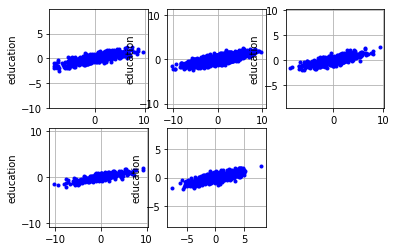

In [237]:
# Plot Education
race_m = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

education_map = {"asian_m": (asian_m_mgmtScore, asian_m_education),
        "white_m": (white_m_mgmtScore, white_m_education),
        "black_m": (black_m_mgmtScore, black_m_education),
        "other_m": (other_m_mgmtScore, other_m_education),
        "hispanic_m": (hispanic_m_mgmtScore, hispanic_m_education),
        "asian_f": (asian_f_mgmtScore, asian_f_education),
        "white_f": (white_f_mgmtScore, white_f_education),
        "black_f": (black_f_mgmtScore, black_f_education),
        "other_f": (other_f_mgmtScore, other_f_education),
        "hispanic_f": (hispanic_f_mgmtScore, hispanic_f_education)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, education = education_map[race_m[counter-1]]
    plot(jobTenure, education, "b.")
    ylabel("education")
    axis("equal")
    counter += 1
    grid(True)

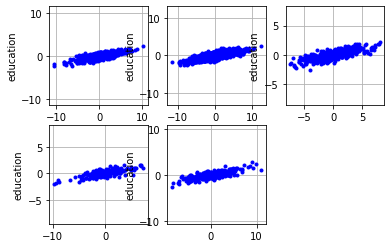

In [238]:
### FEMALES ###
race_f = ["asian_f", "white_f", "black_f", "other_f", "hispanic_f"]

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, education = education_map[race_f[counter-1]]
    plot(jobTenure, education, "b.")
    ylabel("education")
    axis("equal")
    counter += 1
    grid(True)

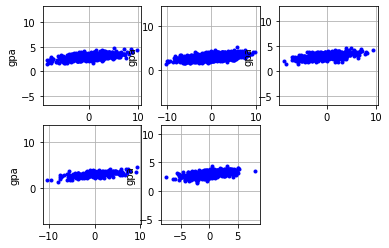

In [239]:
# Plot GPA
race_m = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

gpa_map = {"asian_m": (asian_m_mgmtScore, asian_m_gpa),
        "white_m": (white_m_mgmtScore, white_m_gpa),
        "black_m": (black_m_mgmtScore, black_m_gpa),
        "other_m": (other_m_mgmtScore, other_m_gpa),
        "hispanic_m": (hispanic_m_mgmtScore, hispanic_m_gpa),
        "asian_f": (asian_f_mgmtScore, asian_f_gpa),
        "white_f": (white_f_mgmtScore, white_f_gpa),
        "black_f": (black_f_mgmtScore, black_f_gpa),
        "other_f": (other_f_mgmtScore, other_f_gpa),
        "hispanic_f": (hispanic_f_mgmtScore, hispanic_f_gpa)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, gpa = gpa_map[race_m[counter-1]]
    plot(jobTenure, gpa, "b.")
    ylabel("gpa")
    axis("equal")
    counter += 1
    grid(True)

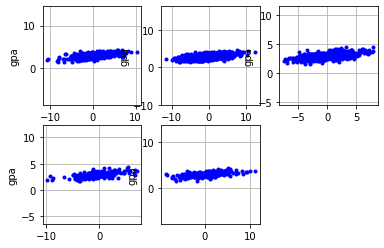

In [240]:
### Females ###
counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, gpa = gpa_map[race_f[counter-1]]
    plot(jobTenure, gpa, "b.")
    ylabel("gpa")
    axis("equal")
    counter += 1
    grid(True)

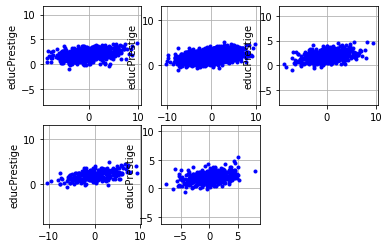

In [241]:
# Plot Educational Prestige
educPrestige_map = {"asian_m": (asian_m_mgmtScore, asian_m_educPrestige),
        "white_m": (white_m_mgmtScore, white_m_educPrestige),
        "black_m": (black_m_mgmtScore, black_m_educPrestige),
        "other_m": (other_m_mgmtScore, other_m_educPrestige),
        "hispanic_m": (hispanic_m_mgmtScore, hispanic_m_educPrestige),
        "asian_f": (asian_f_mgmtScore, asian_f_educPrestige),
        "white_f": (white_f_mgmtScore, white_f_educPrestige),
        "black_f": (black_f_mgmtScore, black_f_educPrestige),
        "other_f": (other_f_mgmtScore, other_f_educPrestige),
        "hispanic_f": (hispanic_f_mgmtScore, hispanic_f_educPrestige)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, educPrestige = educPrestige_map[race_m[counter-1]]
    plot(jobTenure, educPrestige, "b.")
    ylabel("educPrestige")
    axis("equal")
    counter += 1
    grid(True)

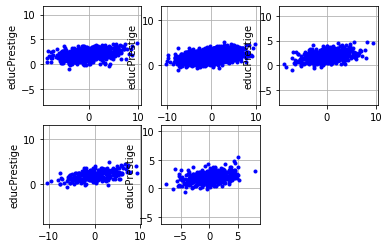

In [242]:
counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, educPrestige = educPrestige_map[race_m[counter-1]]
    plot(jobTenure, educPrestige, "b.")
    ylabel("educPrestige")
    axis("equal")
    counter += 1
    grid(True)

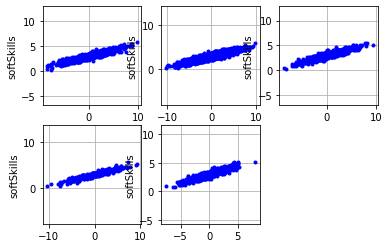

In [243]:
# Plot Soft Skills
softSkills_map = {"asian_m": (asian_m_mgmtScore, asian_m_softSkills),
        "white_m": (white_m_mgmtScore, white_m_softSkills),
        "black_m": (black_m_mgmtScore, black_m_softSkills),
        "other_m": (other_m_mgmtScore, other_m_softSkills),
        "hispanic_m": (hispanic_m_mgmtScore, hispanic_m_softSkills),
        "asian_f": (asian_f_mgmtScore, asian_f_softSkills),
        "white_f": (white_f_mgmtScore, white_f_softSkills),
        "black_f": (black_f_mgmtScore, black_f_softSkills),
        "other_f": (other_f_mgmtScore, other_f_softSkills),
        "hispanic_f": (hispanic_f_mgmtScore, hispanic_f_softSkills)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, softSkills = softSkills_map[race_m[counter-1]]
    plot(jobTenure, softSkills, "b.")
    ylabel("softSkills")
    axis("equal")
    counter += 1
    grid(True)

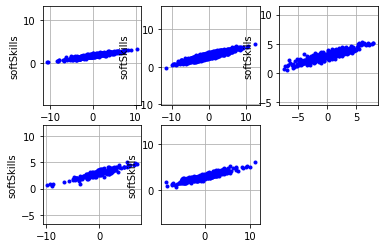

In [244]:
### FEMALE ### 
counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, softSkills = softSkills_map[race_f[counter-1]]
    plot(jobTenure, softSkills, "b.")
    ylabel("softSkills")
    axis("equal")
    counter += 1
    grid(True)

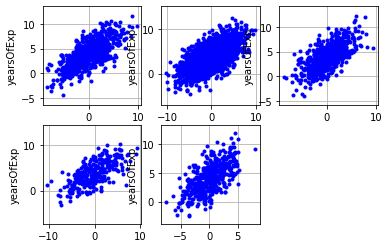

In [245]:
# Plot Years of Experience
race = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

yearsOfExp_map = {"asian_m": (asian_m_mgmtScore, asian_m_yearsOfExp),
        "white_m": (white_m_mgmtScore, white_m_yearsOfExp),
        "black_m": (black_m_mgmtScore, black_m_yearsOfExp),
        "other_m": (other_m_mgmtScore, other_m_yearsOfExp),
        "hispanic_m": (hispanic_m_mgmtScore, hispanic_m_yearsOfExp),
        "asian_f": (asian_f_mgmtScore, asian_f_yearsOfExp),
        "white_f": (white_f_mgmtScore, white_f_yearsOfExp),
        "black_f": (black_f_mgmtScore, black_f_yearsOfExp),
        "other_f": (other_f_mgmtScore, other_f_yearsOfExp),
        "hispanic_f": (hispanic_f_mgmtScore, hispanic_f_yearsOfExp)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, yearsOfExp = yearsOfExp_map[race_m[counter-1]]
    plot(jobTenure, yearsOfExp, "b.")
    ylabel("yearsOfExp")
    axis("equal")
    counter += 1
    grid(True)

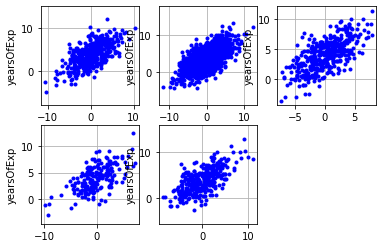

In [246]:
counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, yearsOfExp = yearsOfExp_map[race_f[counter-1]]
    plot(jobTenure, yearsOfExp, "b.")
    ylabel("yearsOfExp")
    axis("equal")
    counter += 1
    grid(True)

### Metric 2 - Job Tenure

In [247]:
asian_f_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  .90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

asian_m_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  .90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

black_f_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  .90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

black_m_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  .90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

white_m_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  -2.90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

white_f_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  -2.90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]


hispanic_f_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  .90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

hispanic_m_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  .90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

other_f_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  .90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

other_m_matrix2 = [
    [  1.20, 1.00, 1.10, 1.10],
    [ 1.00,  .90, 1.30, 1.3],
    [ -1.20,  -1.50,  -1.20, 1.4],
    [1.00, .9, .8, 1.1]
]

In [248]:
asian_m_jobTenure, asian_m_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(asian_m, asian_m_matrix2, numVars=4)
asian_f_jobTenure, asian_f_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(asian_f, asian_f_matrix2, numVars=4)

white_m_jobTenure, white_m_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(white_m, white_m_matrix2, numVars=4)
white_f_jobTenure, white_f_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(white_f, white_f_matrix2, numVars=4)

black_m_jobTenure, black_m_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(black_m, black_m_matrix2, numVars=4)
black_f_jobTenure, black_f_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(black_f, black_f_matrix2, numVars=4)

hispanic_m_jobTenure, hispanic_m_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(hispanic_m, hispanic_m_matrix2, numVars=4)
hispanic_f_jobTenure, hispanic_f_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(hispanic_f, hispanic_f_matrix2, numVars=4)

other_m_jobTenure, other_m_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(other_m, other_m_matrix2, numVars=4)
other_f_jobTenure, other_f_correlatedFeatures2 = dataGen.featuresCorrelatingToMetric(other_f, other_f_matrix2, numVars=4)

[[ 4.86  4.96 -2.72  4.19]
 [ 4.96  5.19 -2.29  4.28]
 [-2.72 -2.29  7.09 -1.97]
 [ 4.19  4.28 -1.97  3.66]]
[1.55382437e+01 5.17440585e+00 4.36191993e-03 8.29885059e-02]
[[ 4.86  4.96 -2.72  4.19]
 [ 4.96  5.19 -2.29  4.28]
 [-2.72 -2.29  7.09 -1.97]
 [ 4.19  4.28 -1.97  3.66]]
[1.55382437e+01 5.17440585e+00 4.36191993e-03 8.29885059e-02]
[[ 4.86  1.16 -2.72  4.19]
 [ 1.16 12.79  3.41  0.86]
 [-2.72  3.41  7.09 -1.97]
 [ 4.19  0.86 -1.97  3.66]]
[2.38994105e-03 3.07912573e+00 1.09313888e+01 1.43870955e+01]
[[ 4.86  1.16 -2.72  4.19]
 [ 1.16 12.79  3.41  0.86]
 [-2.72  3.41  7.09 -1.97]
 [ 4.19  0.86 -1.97  3.66]]
[2.38994105e-03 3.07912573e+00 1.09313888e+01 1.43870955e+01]
[[ 4.86  4.96 -2.72  4.19]
 [ 4.96  5.19 -2.29  4.28]
 [-2.72 -2.29  7.09 -1.97]
 [ 4.19  4.28 -1.97  3.66]]
[1.55382437e+01 5.17440585e+00 4.36191993e-03 8.29885059e-02]
[[ 4.86  4.96 -2.72  4.19]
 [ 4.96  5.19 -2.29  4.28]
 [-2.72 -2.29  7.09 -1.97]
 [ 4.19  4.28 -1.97  3.66]]
[1.55382437e+01 5.17440585e+00 4.361

In [249]:
# Replaces all neg values with zero
def negsToZero(array):
    adjustedArray = array
    for x in range(len(adjustedArray)):
        if adjustedArray[x] < 0:
            adjustedArray[x] = 0
    return adjustedArray

# Replaces all negative values with their abs value
def negsToOpp(array):
    adjustedArray = array
    for x in range(len(adjustedArray)):
        if adjustedArray[x] < 0:
            adjustedArray[x] = -1 * adjustedArray[x]
    return adjustedArray

def transformTenureCorrelates(correlatesToTenure, coeffs):
    militaryTenure = np.round(negsToZero(correlatesToTenure[0] * .5 *coeffs["Military Tenure"] + 2), 1) # militaryTenure
    commuteTime = np.round(negsToOpp(correlatesToTenure[1] * 10*coeffs["Commute Time"] + 30), 0)# commuteTime
    culturalFit = np.round(correlatesToTenure[2]*coeffs["Cultural Fit"], 2)
    return militaryTenure, commuteTime, culturalFit

asian_m_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": 1.0, 
}

asian_f_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": .8, 
}

hispanic_m_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": 1.0, 
}

hispanic_f_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": .8,  
}

black_m_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": 1.0, 
}

black_f_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": .8, 
}

white_m_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": 1.0, 
}

white_f_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": .8,  
}

other_m_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": 1.0, 
}

other_f_coeffs2 = {
    "Military Tenure": 1.0, 
    "Commute Time": 1.0, 
    "Cultural Fit": .8, 
}

In [250]:
asian_m_militaryTenure, asian_m_commuteTime, asian_m_culturalFit = transformTenureCorrelates(asian_m_correlatedFeatures2, asian_m_coeffs2)
asian_f_militaryTenure, asian_f_commuteTime, asian_f_culturalFit = transformTenureCorrelates(asian_f_correlatedFeatures2, asian_f_coeffs2)

white_m_militaryTenure, white_m_commuteTime, white_m_culturalFit = transformTenureCorrelates(white_m_correlatedFeatures2, white_m_coeffs2)
white_f_militaryTenure, white_f_commuteTime, white_f_culturalFit = transformTenureCorrelates(white_f_correlatedFeatures2, white_f_coeffs2)

black_m_militaryTenure, black_m_commuteTime, black_m_culturalFit = transformTenureCorrelates(black_m_correlatedFeatures2, black_m_coeffs2)
black_f_militaryTenure, black_f_commuteTime, black_f_culturalFit = transformTenureCorrelates(black_f_correlatedFeatures2, black_f_coeffs2)

hispanic_m_militaryTenure, hispanic_m_commuteTime, hispanic_m_culturalFit = transformTenureCorrelates(hispanic_m_correlatedFeatures2, hispanic_m_coeffs2)
hispanic_f_militaryTenure, hispanic_f_commuteTime, hispanic_f_culturalFit = transformTenureCorrelates(hispanic_f_correlatedFeatures2, hispanic_f_coeffs2)

other_m_militaryTenure, other_m_commuteTime, other_m_culturalFit = transformTenureCorrelates(other_m_correlatedFeatures2, other_m_coeffs2)
other_f_militaryTenure, other_f_commuteTime, other_f_culturalFit = transformTenureCorrelates(other_f_correlatedFeatures2, other_f_coeffs2)

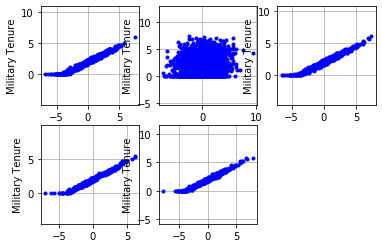

In [251]:
# Plot Military Tenure
race_m = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

militaryTenure_map = {
        "asian_m": (asian_m_jobTenure, asian_m_militaryTenure),
        "white_m": (white_m_jobTenure, white_m_militaryTenure),
        "black_m": (black_m_jobTenure, black_m_militaryTenure),
        "other_m": (other_m_jobTenure, other_m_militaryTenure),
        "hispanic_m": (hispanic_m_jobTenure, hispanic_m_militaryTenure),
        "asian_f": (asian_f_jobTenure, asian_f_militaryTenure),
        "white_f": (white_f_jobTenure, white_f_militaryTenure),
        "black_f": (black_f_jobTenure, black_f_militaryTenure),
        "other_f": (other_f_jobTenure, other_f_militaryTenure),
        "hispanic_f": (hispanic_f_jobTenure, hispanic_f_militaryTenure),            
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, militaryTenure = militaryTenure_map[race_m[counter-1]]
    plot(jobTenure, militaryTenure, "b.")
    ylabel("Military Tenure")
    axis("equal")
    counter += 1
    grid(True)


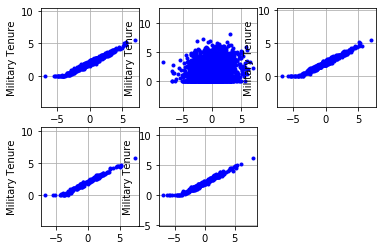

In [252]:
### FEMALES ###
race_f = ["asian_f", "white_f", "black_f", "other_f", "hispanic_f"]

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, militaryTenure = militaryTenure_map[race_f[counter-1]]
    plot(jobTenure, militaryTenure, "b.")
    ylabel("Military Tenure")
    axis("equal")
    counter += 1
    grid(True)

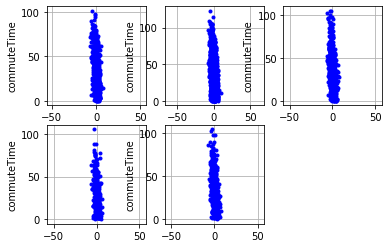

In [253]:
# Plot Commute Time
race = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

commuteTime_map = {"asian_m": (asian_m_jobTenure, asian_m_commuteTime),
        "white_m": (white_m_jobTenure, white_m_commuteTime),
        "black_m": (black_m_jobTenure, black_m_commuteTime),
        "other_m": (other_m_jobTenure, other_m_commuteTime),
        "hispanic_m": (hispanic_m_jobTenure, hispanic_m_commuteTime),
                   
        "asian_f": (asian_f_jobTenure, asian_f_commuteTime),
        "white_f": (white_f_jobTenure, white_f_commuteTime),
        "black_f": (black_f_jobTenure, black_f_commuteTime),
        "other_f": (other_f_jobTenure, other_f_commuteTime),
        "hispanic_f": (hispanic_f_jobTenure, hispanic_f_commuteTime)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, commuteTime = commuteTime_map[race_m[counter-1]]
    plot(jobTenure, commuteTime, "b.")
    ylabel("commuteTime")
    axis("equal")
    counter += 1
    grid(True)

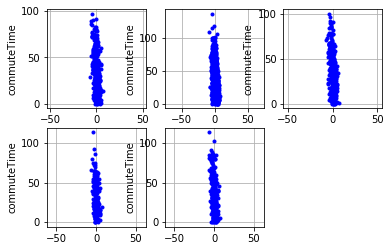

In [254]:
### FEMALES ###
race_f = ["asian_f", "white_f", "black_f", "other_f", "hispanic_f"]

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, commuteTime = commuteTime_map[race_f[counter-1]]
    plot(jobTenure, commuteTime, "b.")
    ylabel("commuteTime")
    axis("equal")
    counter += 1
    grid(True)

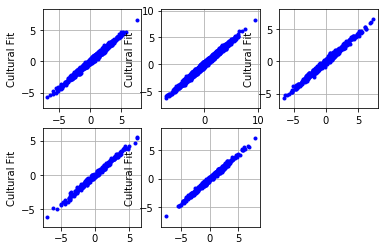

In [255]:
# Plot Cultural Fit
race = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

culturalFit_map = {"asian_m": (asian_m_jobTenure, asian_m_culturalFit),
        "white_m": (white_m_jobTenure, white_m_culturalFit),
        "black_m": (black_m_jobTenure, black_m_culturalFit),
        "other_m": (other_m_jobTenure, other_m_culturalFit),
        "hispanic_m": (hispanic_m_jobTenure, hispanic_m_culturalFit),
                   
        "asian_f": (asian_f_jobTenure, asian_f_culturalFit),
        "white_f": (white_f_jobTenure, white_f_culturalFit),
        "black_f": (black_f_jobTenure, black_f_culturalFit),
        "other_f": (other_f_jobTenure, other_f_culturalFit),
        "hispanic_f": (hispanic_f_jobTenure, hispanic_f_culturalFit)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, culturalFit = culturalFit_map[race_m[counter-1]]
    plot(jobTenure, culturalFit, "b.")
    ylabel("Cultural Fit")
    axis("equal")
    counter += 1
    grid(True)

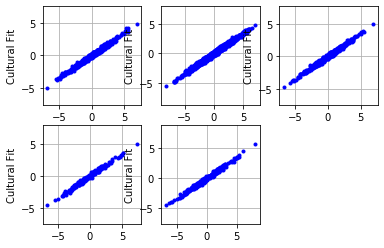

In [256]:
### FEMALES ###
race_f = ["asian_f", "white_f", "black_f", "other_f", "hispanic_f"]

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, culturalFit = culturalFit_map[race_f[counter-1]]
    plot(jobTenure, culturalFit, "b.")
    ylabel("Cultural Fit")
    axis("equal")
    counter += 1
    grid(True)
    



### Metric3 - Average Deals Closed

In [257]:
asian_f_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

asian_m_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

black_f_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

black_m_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

white_f_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

white_m_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

hispanic_m_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

hispanic_f_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

other_f_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

other_m_matrix3 = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]

In [258]:
asian_m_dealsClosed, asian_m_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(asian_m, asian_m_matrix3, numVars=4)
asian_f_dealsClosed, asian_f_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(asian_f, asian_f_matrix3, numVars=4)

white_m_dealsClosed, white_m_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(white_m, white_m_matrix3, numVars=4)
white_f_dealsClosed, white_f_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(white_f, white_f_matrix3, numVars=4)

black_m_dealsClosed, black_m_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(black_m, black_m_matrix3, numVars=4)
black_f_dealsClosed, black_f_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(black_f, black_f_matrix3, numVars=4)
hispanic_m_dealsClosed, hispanic_m_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(hispanic_m, hispanic_m_matrix3, numVars=4)
hispanic_f_dealsClosed, hispanic_f_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(hispanic_f, hispanic_f_matrix3, numVars=4)

other_m_dealsClosed, other_m_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(other_m, other_m_matrix3, numVars=4)
other_f_dealsClosed, other_f_correlatedFeatures3 = dataGen.featuresCorrelatingToMetric(other_f, other_f_matrix3, numVars=4)

[[5.16     3.98     4.235    4.2011  ]
 [3.98     4.34     3.745    3.2503  ]
 [4.235    3.745    4.0801   3.5821  ]
 [4.2011   3.2503   3.5821   3.462001]]
[1.58390244e+01 9.07804471e-01 9.50316454e-04 2.94321773e-01]
[[5.16     3.98     4.235    4.2011  ]
 [3.98     4.34     3.745    3.2503  ]
 [4.235    3.745    4.0801   3.5821  ]
 [4.2011   3.2503   3.5821   3.462001]]
[1.58390244e+01 9.07804471e-01 9.50316454e-04 2.94321773e-01]
[[5.16     3.98     4.235    4.2011  ]
 [3.98     4.34     3.745    3.2503  ]
 [4.235    3.745    4.0801   3.5821  ]
 [4.2011   3.2503   3.5821   3.462001]]
[1.58390244e+01 9.07804471e-01 9.50316454e-04 2.94321773e-01]
[[5.16     3.98     4.235    4.2011  ]
 [3.98     4.34     3.745    3.2503  ]
 [4.235    3.745    4.0801   3.5821  ]
 [4.2011   3.2503   3.5821   3.462001]]
[1.58390244e+01 9.07804471e-01 9.50316454e-04 2.94321773e-01]
[[5.16     3.98     4.235    4.2011  ]
 [3.98     4.34     3.745    3.2503  ]
 [4.235    3.745    4.0801   3.5821  ]
 [4.201

In [259]:
asian_m_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

asian_f_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

white_m_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

white_f_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

black_m_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

black_f_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

hispanic_m_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

hispanic_f_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

other_m_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

other_f_coeffs3 = {
    "Leadership Capability": 1.0, 
    "Hirevue Score": 1.0,
    "Technical Aptitude": 1.0
}

In [260]:
def transformDealCorrelates(dealsClosed, correlatesToDeals, coeffs):
    dealsClosed = np.round(negsToZero(dealsClosed + 7), 2)
    leadershipCapability = np.round(negsToZero(correlatesToDeals[0] * .5 *coeffs["Leadership Capability"] + 2), 2) # leadership
    hirevueScore = np.round(correlatesToDeals[1]* coeffs["Hirevue Score"], 2) # hireVue
    technicalApt = np.round(correlatesToDeals[2]* coeffs["Technical Aptitude"], 2) # technical aptitude
    return dealsClosed, leadershipCapability, hirevueScore, technicalApt

asian_m_dealsClosed, asian_m_leadershipCapability, asian_m_hirevueScore, asian_m_technicalApt = transformDealCorrelates(asian_m_dealsClosed, asian_m_correlatedFeatures3, asian_m_coeffs3)
asian_f_dealsClosed, asian_f_leadershipCapability, asian_f_hirevueScore, asian_f_technicalApt = transformDealCorrelates(asian_f_dealsClosed, asian_f_correlatedFeatures3, asian_f_coeffs3)

black_m_dealsClosed, black_m_leadershipCapability, black_m_hirevueScore, black_m_technicalApt = transformDealCorrelates(black_m_dealsClosed, black_m_correlatedFeatures3, black_m_coeffs3)
black_f_dealsClosed, black_f_leadershipCapability, black_f_hirevueScore, black_f_technicalApt = transformDealCorrelates(black_f_dealsClosed, black_f_correlatedFeatures3, black_f_coeffs3)

white_m_dealsClosed, white_m_leadershipCapability, white_m_hirevueScore, white_m_technicalApt = transformDealCorrelates(white_m_dealsClosed, white_m_correlatedFeatures3, white_m_coeffs3)
white_f_dealsClosed, white_f_leadershipCapability, white_f_hirevueScore, white_f_technicalApt = transformDealCorrelates(white_f_dealsClosed, white_f_correlatedFeatures3, white_f_coeffs3)

hispanic_m_dealsClosed, hispanic_m_leadershipCapability, hispanic_m_hirevueScore, hispanic_m_technicalApt = transformDealCorrelates(hispanic_m_dealsClosed, hispanic_m_correlatedFeatures3, hispanic_m_coeffs3)
hispanic_f_dealsClosed, hispanic_f_leadershipCapability, hispanic_f_hirevueScore, hispanic_f_technicalApt = transformDealCorrelates(hispanic_f_dealsClosed, hispanic_f_correlatedFeatures3, hispanic_f_coeffs3)

other_m_dealsClosed, other_m_leadershipCapability, other_m_hirevueScore, other_m_technicalApt = transformDealCorrelates(other_m_dealsClosed, other_m_correlatedFeatures3, other_m_coeffs3)
other_f_dealsClosed, other_f_leadershipCapability, other_f_hirevueScore, other_f_technicalApt = transformDealCorrelates(other_f_dealsClosed, other_f_correlatedFeatures3, other_f_coeffs3)


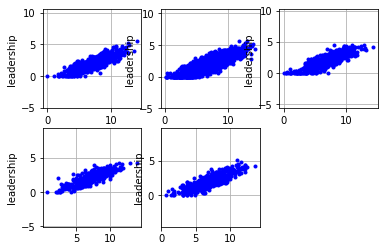

In [261]:
# Plot Leadership Capability
race = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

leadership_map = {"asian_m": (asian_m_dealsClosed, asian_m_leadershipCapability),
        "white_m": (white_m_dealsClosed, white_m_leadershipCapability),
        "black_m": (black_m_dealsClosed, black_m_leadershipCapability),
        "other_m": (other_m_dealsClosed, other_m_leadershipCapability),
        "hispanic_m": (hispanic_m_dealsClosed, hispanic_m_leadershipCapability),
        "asian_f": (asian_f_dealsClosed, asian_f_leadershipCapability),
        "white_f": (white_f_dealsClosed, white_f_leadershipCapability),
        "black_f": (black_f_dealsClosed, black_f_leadershipCapability),
        "other_f": (other_f_dealsClosed, other_f_leadershipCapability),
        "hispanic_f": (hispanic_f_dealsClosed, hispanic_f_leadershipCapability)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, leadership = leadership_map[race_m[counter-1]]
    plot(jobTenure, leadership, "b.")
    ylabel("leadership")
    axis("equal")
    counter += 1
    grid(True)

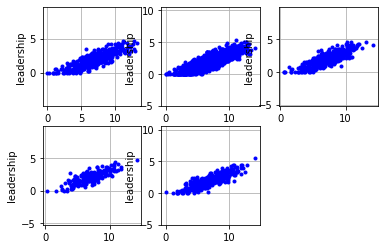

In [262]:
counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, leadership = leadership_map[race_f[counter-1]]
    plot(jobTenure, leadership, "b.")
    ylabel("leadership")
    axis("equal")
    counter += 1
    grid(True)

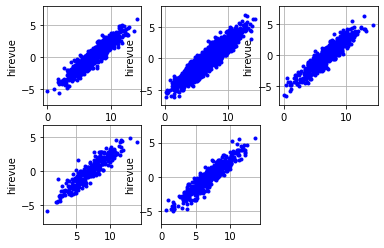

In [263]:
# Plot HireVueScore
race = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

hirevue_map = {"asian_m": (asian_m_dealsClosed, asian_m_hirevueScore),
        "white_m": (white_m_dealsClosed, white_m_hirevueScore),
        "black_m": (black_m_dealsClosed, black_m_hirevueScore),
        "other_m": (other_m_dealsClosed, other_m_hirevueScore),
        "hispanic_m": (hispanic_m_dealsClosed, hispanic_m_hirevueScore),
        "asian_f": (asian_f_dealsClosed, asian_f_hirevueScore),
        "white_f": (white_f_dealsClosed, white_f_hirevueScore),
        "black_f": (black_f_dealsClosed, black_f_hirevueScore),
        "other_f": (other_f_dealsClosed, other_f_hirevueScore),
        "hispanic_f": (hispanic_f_dealsClosed, hispanic_f_hirevueScore)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, hirevue = hirevue_map[race_m[counter-1]]
    plot(jobTenure, hirevue, "b.")
    ylabel("hirevue")
    axis("equal")
    counter += 1
    grid(True)

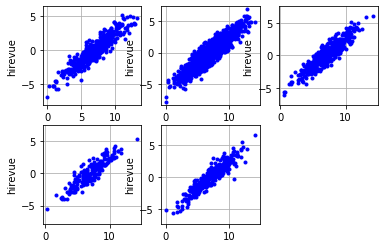

In [264]:
counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, hirevue = hirevue_map[race_f[counter-1]]
    plot(jobTenure, hirevue, "b.")
    ylabel("hirevue")
    axis("equal")
    counter += 1
    grid(True)

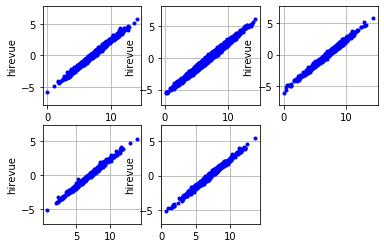

In [265]:
# Plot Technical Apt
race = ["asian_m", "white_m", "black_m", "other_m", "hispanic_m"]

technicalApt_map = {"asian_m": (asian_m_dealsClosed, asian_m_technicalApt),
        "white_m": (white_m_dealsClosed, white_m_technicalApt),
        "black_m": (black_m_dealsClosed, black_m_technicalApt),
        "other_m": (other_m_dealsClosed, other_m_technicalApt),
        "hispanic_m": (hispanic_m_dealsClosed, hispanic_m_technicalApt),
        "asian_f": (asian_f_dealsClosed, asian_f_technicalApt),
        "white_f": (white_f_dealsClosed, white_f_technicalApt),
        "black_f": (black_f_dealsClosed, black_f_technicalApt),
        "other_f": (other_f_dealsClosed, other_f_technicalApt),
        "hispanic_f": (hispanic_f_dealsClosed, hispanic_f_technicalApt)
       }

counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, technicalApt = technicalApt_map[race_m[counter-1]]
    plot(jobTenure, technicalApt, "b.")
    ylabel("hirevue")
    axis("equal")
    counter += 1
    grid(True)

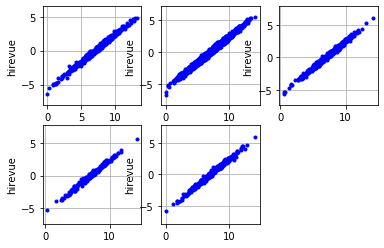

In [266]:
counter = 1
for x in range(1, 6):
    subplot(2,3, counter)
    jobTenure, technicalApt = technicalApt_map[race_f[counter-1]]
    plot(jobTenure, technicalApt, "b.")
    ylabel("hirevue")
    axis("equal")
    counter += 1
    grid(True)

### Asians

In [267]:
percentileToNum = math.floor(.20 * asian_m)
numOfReferrals = math.floor(.25 * asian_m)
top, leftover = dataGen.getTopIndxs(asian_m_mgmtScore, percentileToNum)

asian_m_dict = {
    "Avg Deals Closed": asian_m_dealsClosed, 
    "Technical Aptitude": asian_m_technicalApt,
    "HireVue Score": asian_m_hirevueScore, 
    "Leadership Capability": asian_m_leadershipCapability, 
    "Manager's Assessment Score": asian_m_mgmtScore,
    "Educational Prestige": asian_m_educPrestige, 
    "Education": asian_m_education,
    "Soft Skills": asian_m_softSkills,
    "GPA" : asian_m_gpa, 
    "Years of Experience": asian_m_yearsOfExp,
    "Job Tenure": asian_m_jobTenure,
    "Military Tenure": asian_m_militaryTenure,
    "Avg Commute Time": asian_m_commuteTime,
    "Cultural Fit": asian_m_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(asian_m, asian_m_mgmtScore, asian_m_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(asian_m, asian_m_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(asian_m, asian_m_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(asian_m, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(asian_m, asian_m_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(asian_m, asian_m_mgmtScore),
    "Names": [names.get_full_name(gender = "male") for x in range(asian_m)],
    "Gender": ["male" for x in range(asian_m)],
    "Race": ["Asian" for x in range(asian_m)],
    "Birth Origin": dataGen.genBirthOrigin(asian_m, ["USA", "China", "Australia", "Canada"], [.80, .10, .05, .05]),
    "Age": dataGen.genAge(asian_m, asian_m_yearsOfExp, asian_m_militaryTenure, asian_m_jobTenure),
    "Sports": dataGen.genSportScores(asian_m, asian_m_mgmtScore),
}


(720,)


In [268]:
percentileToNum = math.floor(.20 * asian_f)
numOfReferrals = math.floor(.25 * asian_f)
top, leftover = dataGen.getTopIndxs(asian_f_mgmtScore, percentileToNum)

asian_f_dict = {
    "Avg Deals Closed": asian_f_dealsClosed, 
    "Technical Aptitude": asian_f_technicalApt,
    "HireVue Score": asian_f_hirevueScore, 
    "Leadership Capability": asian_f_leadershipCapability, 
    "Manager's Assessment Score": asian_f_mgmtScore,
    "Educational Prestige": asian_f_educPrestige, 
    "Education": asian_f_education,
    "Soft Skills": asian_f_softSkills,
    "GPA" : asian_f_gpa, 
    "Years of Experience": asian_f_yearsOfExp,
    "Job Tenure": asian_f_jobTenure,
    "Military Tenure": asian_f_militaryTenure,
    "Avg Commute Time": asian_f_commuteTime,
    "Cultural Fit": asian_f_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(asian_f, asian_f_mgmtScore, asian_f_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(asian_f, asian_f_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(asian_f, asian_f_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(asian_f, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(asian_f, asian_f_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(asian_f, asian_f_mgmtScore),
    "Names": [names.get_full_name(gender = "female") for x in range(asian_f)],
    "Gender": ["male" for x in range(asian_f)],
    "Race": ["Asian" for x in range(asian_f)],
    "Birth Origin": dataGen.genBirthOrigin(asian_f, ["USA", "China", "Australia", "Canada"], [.80, .10, .05, .05]),
    "Age": dataGen.genAge(asian_f, asian_f_yearsOfExp, asian_f_militaryTenure, asian_f_jobTenure),
    "Sports": dataGen.genSportScores(asian_f, asian_f_mgmtScore),
}


(480,)


In [269]:
asian_f_df = pd.DataFrame(asian_f_dict)
asian_m_df = pd.DataFrame(asian_m_dict)

### White

In [270]:
percentileToNum = math.floor(.20 * white_f)
numOfReferrals = math.floor(.25 * white_f)
top, leftover = dataGen.getTopIndxs(white_f_mgmtScore, percentileToNum)

white_f_dict = {
    "Avg Deals Closed": white_f_dealsClosed, 
    "Technical Aptitude": white_f_technicalApt,
    "HireVue Score": white_f_hirevueScore, 
    "Leadership Capability": white_f_leadershipCapability, 
    "Manager's Assessment Score": white_f_mgmtScore,
    "Educational Prestige": white_f_educPrestige, 
    "Education": white_f_education,
    "Soft Skills": white_f_softSkills,
    "GPA" : white_f_gpa, 
    "Years of Experience": white_f_yearsOfExp,
    "Job Tenure": white_f_jobTenure,
    "Military Tenure": white_f_militaryTenure,
    "Avg Commute Time": white_f_commuteTime,
    "Cultural Fit": white_f_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(white_f, white_f_mgmtScore, white_f_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(white_f, white_f_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(white_f, white_f_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(white_f, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(white_f, white_f_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(white_f, white_f_mgmtScore),
    "Names": [names.get_full_name(gender = "female") for x in range(white_f)],
    "Gender": ["female" for x in range(white_f)],
    "Race": ["Caucasian" for x in range(white_f)],
    "Birth Origin": dataGen.genBirthOrigin(white_f, ["USA", "Australia", "Canada"], [.9, .05, .05]),
    "Age": dataGen.genAge(white_f, white_f_yearsOfExp, white_f_militaryTenure, white_f_jobTenure),
    "Sports": dataGen.genSportScores(white_f, white_f_mgmtScore),
}


percentileToNum = math.floor(.20 * white_m)
numOfReferrals = math.floor(.25 * white_m)
top, leftover = dataGen.getTopIndxs(white_m_mgmtScore, percentileToNum)

white_m_dict = {
    "Avg Deals Closed": white_m_dealsClosed, 
    "Technical Aptitude": white_m_technicalApt,
    "HireVue Score": white_m_hirevueScore, 
    "Leadership Capability": white_m_leadershipCapability, 
    "Manager's Assessment Score": white_m_mgmtScore,
    "Educational Prestige": white_m_educPrestige, 
    "Education": white_m_education,
    "Soft Skills": white_m_softSkills,
    "GPA" : white_m_gpa, 
    "Years of Experience": white_m_yearsOfExp,
    "Job Tenure": white_m_jobTenure,
    "Military Tenure": white_m_militaryTenure,
    "Avg Commute Time": white_m_commuteTime,
    "Cultural Fit": white_m_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(white_m, white_m_mgmtScore, white_m_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(white_m, white_m_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(white_m, white_m_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(white_m, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(white_m, white_m_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(white_m, white_m_mgmtScore),
    "Names": [names.get_full_name(gender = "male") for x in range(white_m)],
    "Gender": ["male" for x in range(white_m)],
    "Race": ["Caucasian" for x in range(white_m)],
    "Birth Origin": dataGen.genBirthOrigin(white_m, ["USA", "Australia", "Canada"], [.9, .05, .05]),
    "Age": dataGen.genAge(white_m, white_m_yearsOfExp, white_m_militaryTenure, white_m_jobTenure),
    "Sports": dataGen.genSportScores(white_m, white_m_mgmtScore),
}

(1760,)
(2640,)


In [271]:
white_f_df = pd.DataFrame(white_f_dict)
white_m_df = pd.DataFrame(white_m_dict)

### Hispanic

In [272]:
percentileToNum = math.floor(.20 * hispanic_f)
numOfReferrals = math.floor(.25 * hispanic_f)
top, leftover = dataGen.getTopIndxs(hispanic_f_mgmtScore, percentileToNum)

hispanic_f_dict = {
    "Avg Deals Closed": hispanic_f_dealsClosed, 
    "Technical Aptitude": hispanic_f_technicalApt,
    "HireVue Score": hispanic_f_hirevueScore, 
    "Leadership Capability": hispanic_f_leadershipCapability, 
    "Manager's Assessment Score": hispanic_f_mgmtScore,
    "Educational Prestige": hispanic_f_educPrestige, 
    "Education": hispanic_f_education,
    "Soft Skills": hispanic_f_softSkills,
    "GPA" : hispanic_f_gpa, 
    "Years of Experience": hispanic_f_yearsOfExp,
    "Job Tenure": hispanic_f_jobTenure,
    "Military Tenure": hispanic_f_militaryTenure,
    "Avg Commute Time": hispanic_f_commuteTime,
    "Cultural Fit": hispanic_f_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(hispanic_f, hispanic_f_mgmtScore, hispanic_f_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(hispanic_f, hispanic_f_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(hispanic_f, hispanic_f_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(hispanic_f, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(hispanic_f, hispanic_f_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(hispanic_f, hispanic_f_mgmtScore),
    "Names": [names.get_full_name(gender = "female") for x in range(hispanic_f)],
    "Gender": ["female" for x in range(hispanic_f)],
    "Race": ["Hispanic" for x in range(hispanic_f)],
    "Birth Origin": dataGen.genBirthOrigin(hispanic_f, ["USA", "Australia", "Canada"], [.9, .05, .05]),
    "Age": dataGen.genAge(hispanic_f, hispanic_f_yearsOfExp, hispanic_f_militaryTenure, hispanic_f_jobTenure),
    "Sports": dataGen.genSportScores(hispanic_f, hispanic_f_mgmtScore),
}


percentileToNum = math.floor(.20 * hispanic_m)
numOfReferrals = math.floor(.25 * hispanic_m)
top, leftover = dataGen.getTopIndxs(hispanic_m_mgmtScore, percentileToNum)

hispanic_m_dict = {
    "Avg Deals Closed": hispanic_m_dealsClosed, 
    "Technical Aptitude": hispanic_m_technicalApt,
    "HireVue Score": hispanic_m_hirevueScore, 
    "Leadership Capability": hispanic_m_leadershipCapability, 
    "Manager's Assessment Score": hispanic_m_mgmtScore,
    "Educational Prestige": hispanic_m_educPrestige, 
    "Education": hispanic_m_education,
    "Soft Skills": hispanic_m_softSkills,
    "GPA" : hispanic_m_gpa, 
    "Years of Experience": hispanic_m_yearsOfExp,
    "Job Tenure": hispanic_m_jobTenure,
    "Military Tenure": hispanic_m_militaryTenure,
    "Avg Commute Time": hispanic_m_commuteTime,
    "Cultural Fit": hispanic_m_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(hispanic_m, hispanic_m_mgmtScore, hispanic_m_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(hispanic_m, hispanic_m_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(hispanic_m, hispanic_m_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(hispanic_m, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(hispanic_m, hispanic_m_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(hispanic_m, hispanic_m_mgmtScore),
    "Names": [names.get_full_name(gender = "male") for x in range(hispanic_m)],
    "Gender": ["female" for x in range(hispanic_m)],
    "Race": ["Hispanic" for x in range(hispanic_m)],
    "Birth Origin": dataGen.genBirthOrigin(hispanic_m, ["USA", "Australia", "Canada"], [.9, .05, .05]),
    "Age": dataGen.genAge(hispanic_m, hispanic_m_yearsOfExp, hispanic_m_militaryTenure, hispanic_m_jobTenure),
    "Sports": dataGen.genSportScores(hispanic_m, hispanic_m_mgmtScore),
}

(320,)
(480,)


In [273]:
hispanic_f_df = pd.DataFrame(hispanic_f_dict)
hispanic_m_df = pd.DataFrame(hispanic_m_dict)

### Black

In [274]:
percentileToNum = math.floor(.20 * black_f)
numOfReferrals = math.floor(.25 * black_f)
top, leftover = dataGen.getTopIndxs(black_f_mgmtScore, percentileToNum)

black_f_dict = {
    "Avg Deals Closed": black_f_dealsClosed, 
    "Technical Aptitude": black_f_technicalApt,
    "HireVue Score": black_f_hirevueScore, 
    "Leadership Capability": black_f_leadershipCapability, 
    "Manager's Assessment Score": black_f_mgmtScore,
    "Educational Prestige": black_f_educPrestige, 
    "Education": black_f_education,
    "Soft Skills": black_f_softSkills,
    "GPA" : black_f_gpa, 
    "Years of Experience": black_f_yearsOfExp,
    "Job Tenure": black_f_jobTenure,
    "Military Tenure": black_f_militaryTenure,
    "Avg Commute Time": black_f_commuteTime,
    "Cultural Fit": black_f_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(black_f, black_f_mgmtScore, black_f_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(black_f, black_f_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(black_f, black_f_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(black_f, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(black_f, black_f_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(black_f, black_f_mgmtScore),
    "Names": [names.get_full_name(gender = "female") for x in range(black_f)],
    "Gender": ["female" for x in range(black_f)],
    "Race": ["African-American" for x in range(black_f)],
    "Birth Origin": dataGen.genBirthOrigin(black_f, ["USA", "Australia", "Canada"], [.9, .05, .05]),
    "Age": dataGen.genAge(black_f, black_f_yearsOfExp, black_f_militaryTenure, black_f_jobTenure),
    "Sports": dataGen.genSportScores(black_f, black_f_mgmtScore),
}

percentileToNum = math.floor(.20 * black_m)
numOfReferrals = math.floor(.25 * black_m)
top, leftover = dataGen.getTopIndxs(black_m_mgmtScore, percentileToNum)

black_m_dict = {
    "Avg Deals Closed": black_m_dealsClosed, 
    "Technical Aptitude": black_m_technicalApt,
    "HireVue Score": black_m_hirevueScore, 
    "Leadership Capability": black_m_leadershipCapability, 
    "Manager's Assessment Score": black_m_mgmtScore,
    "Educational Prestige": black_m_educPrestige, 
    "Education": black_m_education,
    "Soft Skills": black_m_softSkills,
    "GPA" : black_m_gpa, 
    "Years of Experience": black_m_yearsOfExp,
    "Job Tenure": black_m_jobTenure,
    "Military Tenure": black_m_militaryTenure,
    "Avg Commute Time": black_m_commuteTime,
    "Cultural Fit": black_m_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(black_m, black_m_mgmtScore, black_m_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(black_m, black_m_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(black_m, black_m_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(black_m, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(black_m, black_m_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(black_m, black_m_mgmtScore),
    "Names": [names.get_full_name(gender = "male") for x in range(black_m)],
    "Gender": ["male" for x in range(black_m)],
    "Race": ["African-American" for x in range(black_m)],
    "Birth Origin": dataGen.genBirthOrigin(black_m, ["USA", "Australia", "Canada"], [.9, .05, .05]),
    "Age": dataGen.genAge(black_m, black_m_yearsOfExp, black_m_militaryTenure, black_m_jobTenure),
    "Sports": dataGen.genSportScores(black_m, black_m_mgmtScore),
}

(448,)
(672,)


In [275]:
black_f_df = pd.DataFrame(black_f_dict)
black_m_df = pd.DataFrame(black_m_dict)

### Other

In [276]:
percentileToNum = math.floor(.20 * other_f)
numOfReferrals = math.floor(.25 * other_f)
top, leftover = dataGen.getTopIndxs(other_f_mgmtScore, percentileToNum)

other_f_dict = {
    "Avg Deals Closed": other_f_dealsClosed, 
    "Technical Aptitude": other_f_technicalApt,
    "HireVue Score": other_f_hirevueScore, 
    "Leadership Capability": other_f_leadershipCapability, 
    "Manager's Assessment Score": other_f_mgmtScore,
    "Educational Prestige": other_f_educPrestige, 
    "Education": other_f_education,
    "Soft Skills": other_f_softSkills,
    "GPA" : other_f_gpa, 
    "Years of Experience": other_f_yearsOfExp,
    "Job Tenure": other_f_jobTenure,
    "Military Tenure": other_f_militaryTenure,
    "Avg Commute Time": other_f_commuteTime,
    "Cultural Fit": other_f_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(other_f, other_f_mgmtScore, other_f_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(other_f, other_f_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(other_f, other_f_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(other_f, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(other_f, other_f_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(other_f, other_f_mgmtScore),
    "Names": [names.get_full_name(gender = "female") for x in range(other_f)],
    "Gender": ["female" for x in range(other_f)],
    "Race": ["Other" for x in range(other_f)],
    "Birth Origin": dataGen.genBirthOrigin(other_f, ["USA", "Australia", "Canada"], [.9, .05, .05]),
    "Age": dataGen.genAge(other_f, other_f_yearsOfExp, other_f_militaryTenure, other_f_jobTenure),
    "Sports": dataGen.genSportScores(other_f, other_f_mgmtScore),
}


percentileToNum = math.floor(.20 * other_m)
numOfReferrals = math.floor(.25 * other_m)
top, leftover = dataGen.getTopIndxs(other_m_mgmtScore, percentileToNum)

other_m_dict = {
    "Avg Deals Closed": other_m_dealsClosed, 
    "Technical Aptitude": other_m_technicalApt,
    "HireVue Score": other_m_hirevueScore, 
    "Leadership Capability": other_m_leadershipCapability, 
    "Manager's Assessment Score": other_m_mgmtScore,
    "Educational Prestige": other_m_educPrestige, 
    "Education": other_m_education,
    "Soft Skills": other_m_softSkills,
    "GPA" : other_m_gpa, 
    "Years of Experience": other_m_yearsOfExp,
    "Job Tenure": other_m_jobTenure,
    "Military Tenure": other_m_militaryTenure,
    "Avg Commute Time": other_m_commuteTime,
    "Cultural Fit": other_m_culturalFit,
    "Undergraduate Degree": dataGen.genDegreeTypes(other_m, other_m_mgmtScore, other_m_education, "biased"),
    "LinkedIn Score": dataGen.genLinkedinScore(other_m, other_m_mgmtScore),
    "Responsible Social Media Use": dataGen.responsibleSocMediaUse(other_m, other_m_mgmtScore),
    "Employee Referral": dataGen.genEmployeeReferrals(other_m, top, leftover, .85, numOfReferrals),
    "Arrest Record": dataGen.genArrestRecords(other_m, other_m_mgmtScore),
    "Criminal Record": dataGen.genCriminalRecords(other_m, other_m_mgmtScore),
    "Names": [names.get_full_name(gender = "male") for x in range(other_m)],
    "Gender": ["male" for x in range(other_m)],
    "Race": ["Other" for x in range(other_m)],
    "Birth Origin": dataGen.genBirthOrigin(other_m, ["USA", "Australia", "Canada"], [.9, .05, .05]),
    "Age": dataGen.genAge(other_m, other_m_yearsOfExp, other_m_militaryTenure, other_m_jobTenure),
    "Sports": dataGen.genSportScores(other_m, other_m_mgmtScore),
}

(192,)
(288,)


In [277]:
other_f_df = pd.DataFrame(other_f_dict)
other_m_df = pd.DataFrame(other_m_dict)

In [278]:
dfs = [other_f_df, other_m_df, white_f_df, white_m_df, hispanic_m_df, hispanic_f_df, 
       black_m_df, black_f_df, asian_m_df, asian_f_df]

m1_dataset = pd.concat(dfs)

In [279]:
m1_dataset

,Avg Deals Closed,Technical Aptitude,HireVue Score,Leadership Capability,Manager's Assessment Score,Educational Prestige,Education,Soft Skills,GPA,Years of Experience,...,Responsible Social Media Use,Employee Referral,Arrest Record,Criminal Record,Names,Gender,Race,Birth Origin,Age,Sports
0,4.85,-1.84,-2.00,1.49,2.205302,1.7,0.41,3.07,3.65,1.0,...,Good,0.0,0.0,0.0,Natasha Willoughby,female,Other,USA,25.0,NCAA
1,4.41,-1.58,0.15,1.77,-0.225303,1.9,-0.09,2.86,2.58,3.2,...,Bad,0.0,0.0,0.0,May Greer,female,Other,USA,32.0,None
2,8.67,1.11,0.80,2.93,0.619930,3.3,-0.26,3.65,3.29,4.4,...,Good,0.0,0.0,0.0,Maria Angle,female,Other,USA,27.0,None
3,8.70,1.38,1.38,3.00,3.707023,2.8,-0.36,4.47,3.97,3.2,...,Good,1.0,0.0,0.0,Shirley Holmes,female,Other,USA,33.0,NCAA
4,8.31,0.88,0.98,3.13,-2.070791,3.6,-0.46,2.53,2.27,1.1,...,Good,0.0,0.0,0.0,Sylvia Rankins,female,Other,USA,23.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,8.09,1.13,1.32,2.14,-3.707261,0.8,0.08,0.81,2.15,1.4,...,Good,0.0,0.0,0.0,Monica Yochum,male,Asian,Canada,24.0,None
476,8.47,0.92,0.07,2.23,0.242477,1.6,0.46,1.65,3.15,3.6,...,Good,0.0,0.0,0.0,Donna Bebout,male,Asian,USA,24.0,None
477,7.74,0.42,-0.36,1.74,5.529981,2.3,0.72,2.87,3.50,9.8,...,Good,1.0,0.0,0.0,Karen Boyd,male,Asian,USA,28.0,NCAA
478,9.41,2.29,3.17,3.34,3.983040,2.1,0.83,2.44,3.84,7.4,...,Good,1.0,0.0,0.0,Kathleen Winter,male,Asian,USA,30.0,NCAA


In [280]:
cols = m1_dataset.columns.tolist()
cols = cols[-5:] + cols[:-5]
m1_dataset = m1_dataset[cols]

m1_dataset.to_csv("employees_m1.csv", index=False)

In [290]:
np.max(m1_dataset.loc[m1_dataset["Gender"] == "female"]["Cultural Fit"])

7.1

In [291]:
np.max(m1_dataset.loc[m1_dataset["Gender"] == "male"]["Cultural Fit"])

8.25